(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

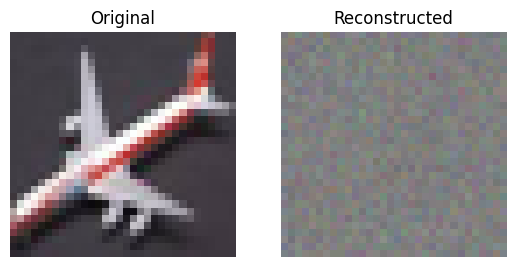

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
dataset = datasets.CIFAR10(root="./data", download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(3*32*32, 128)
        self.decoder = nn.Linear(128, 3*32*32)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        z = torch.relu(self.encoder(x))
        out = torch.sigmoid(self.decoder(z))
        return out.view(-1, 3, 32, 32)

AE = AutoEncoder()
optimizer = optim.Adam(AE.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for real, _ in loader:
    recon = AE(real)
    loss = loss_fn(recon, real)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    break

plt.subplot(1,2,1)
plt.imshow(real[0].permute(1,2,0))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(recon[0].detach().permute(1,2,0))
plt.title("Reconstructed")
plt.axis("off")